In [130]:
import numpy as np 
import pandas as pd 
from scipy import linalg
import matplotlib.pyplot as plt


np.random.seed(100)  

In [131]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn

## 1. Loading the Data


In [3]:
#Data composited every 2 metres
two_composite = pd.read_csv("Curated_data/Kevitsa_composites_2m.csv", low_memory=False)

In [132]:
two_composite.head()

,Sample Number,Name,Depth From,Depth To,X,Y,Z,Length,Ag_ppm,Al_pct,Alt1_Code,Alt1_Int,Alt1_Style,Alt2_Code,Alt2_Int,Alt2_Style,Ars_ppm,Au_ppb,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,Ca_pct,Cd_ppm,Ce_ppm,Cl_ppm,Co_ppm,Comments,Core_Angle,Core_Diameter,CoreLoss_m,Cr_ppm,Cu_pct,Cumulate,DataSet,Date_Logged,Density,Density_gcm3,Density_kgm3,Dest,Fe_pct,Ga_ppm,Gamma_uRh,Gangue_Min,Interval_Length,IP_pct,Ir_ppb,Ja,Jn,Jr,K_pct,La_ppm,Li_ppm,Lith1_Code,Logged_By,Mg_pct,Min1_Code,Min1_Pct,Min1_Style,Min2_Code,Min2_Pct,Min2_Style,Min3_Code,Min3_Pct,Min3_Style,Mn_ppm,Mo_ppm,Na_pct,Nb_ppm,Ni_pct,NiCuEq_pct,NiS_pct,OlivineTot_pct,Ore_Type,Ori_Confidence,Orig_Lith,Os_ppb,P_ppm,Pb_ppm,Pd_ppb,Proportion (Alt1_Code),Proportion (Alt1_Int),Proportion (Alt1_Style),Proportion (Alt2_Code),Proportion (Alt2_Int),Proportion (Alt2_Style),Proportion (Comments),Proportion (DataSet),Proportion (Date_Logged),Proportion (Gangue_Min),Proportion (Lith1_Code),Proportion (Logged_By),Proportion (Min1_Code),Proportion (Min1_Style),Proportion (Min2_Code),Proportion (Min2_Style),Proportion (Min3_Code),Proportion (Min3_Style),Proportion (Ore_Type),Proportion (Ori_Confidence),Proportion (Orig_Lith),Proportion (samp_id),Proportion (SampleID),Proportion (Sulph1_Code),Proportion (Sulph1_Style),Proportion (Sulph2_Code),Proportion (Sulph2_Style),Proportion (Sulph3_Code),Proportion (Sulph3_Style),Proportion (Vein1_Comp),Proportion (Vein1_Style),Proportion (Vein2_Comp),Proportion (Vein2_Style),Pt_ppb,Q,Rb_ppm,Re_ppm,Reading_den,Reading_susc,Recovery_m,Recovery_Pct,Res_Wenner_ohmm,Rh_ppb,RQD_m,RQD_Pct,S_pct,samp_id,SampleID,Sb_ppm,Sc_ppm,Si_pct,Sn_ppm,Sr_ppm,Sulph1_Code,Sulph1_Pct,Sulph1_Style,Sulph2_Code,Sulph2_Pct,Sulph2_Style,Sulph3_Code,Sulph3_Pct,Sulph3_Style,SulphTot_pct,Susc_SI,Te_ppm,Th_ppm,Ti_pct,Tl_ppm,U_ppm,V_ppm,Vein1_Comp,Vein1_Pct,Vein1_Style,Vein2_Comp,Vein2_Pct,Vein2_Style,W_ppm,Weathering,Y_ppm,Zn_ppm,Zr_ppm
0,1,KEV_1,0.0,2.0,3498947.63,7511204.97,236.38,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OVB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Overburden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,KEV_1,2.0,4.0,3498948.84,7511204.92,234.79,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OVB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Overburden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,KEV_1,4.0,6.0,3498950.05,7511204.87,233.20,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OVB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Overburden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,KEV_1,6.0,8.0,3498951.26,7511204.82,231.61,2.0,NaN,NaN,NaN,NaN,Na

## 2. Exploratory analysis on the samples
Start by filtering for only the columns that contain mineral grades


In [133]:
#Filter for mineral columns
two_composite_minerals = two_composite.filter(regex='pct|ppm')

### 2.1 Plot distribution of all minerals


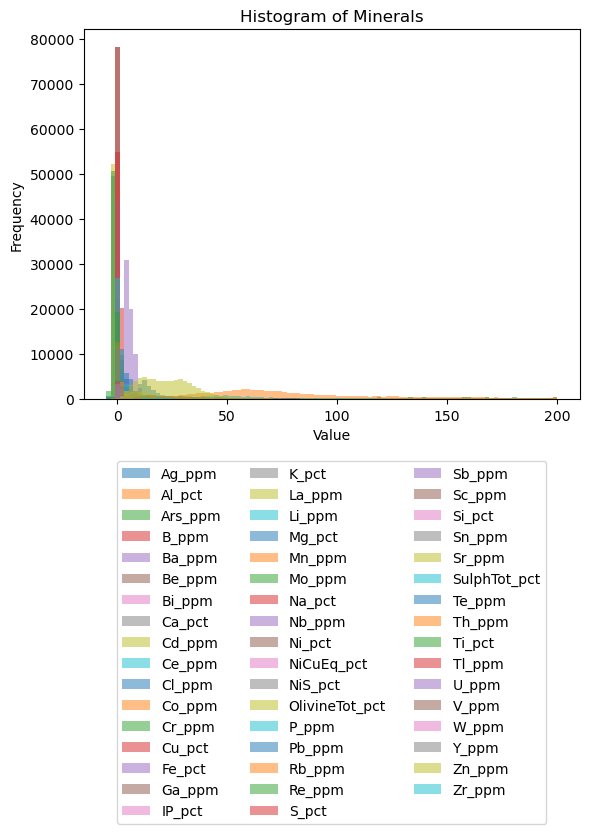

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Assuming you have a DataFrame named 'two_composite' and a list 'two_composite_minerals'
# containing the mineral names you want to plot

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Define the number of columns in the legend
num_columns = 3  # You can adjust this value as needed

# Calculate the number of rows required based on the number of minerals
num_minerals = len(two_composite_minerals)
num_rows = math.ceil(num_minerals / num_columns)

# Iterate through each mineral in two_composite_minerals
for i, mineral in enumerate(two_composite_minerals):
    # Select the data for the current mineral
    two_composite_1mineral = two_composite.loc[:, ["Name", 'X', 'Y', 'Z', mineral]]
    
    # Drop rows with NaN values in the mineral column
    two_composite_1mineral = two_composite_1mineral.dropna(subset=[mineral])
    
    # Plot a histogram for the current mineral
    ax.hist(two_composite_1mineral[mineral], bins=100, range=[-5, 200], alpha=0.5, label=mineral)

# Create a legend with multiple columns
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=num_columns)

# Add labels and a title
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Minerals')

# Show the plot
plt.show()


### 2.2 Analysing the comments column for unusual values
The values -5, -2, -1, 1, 2, 3 have a suspicously high amount of samples, so here I take a look at the `Comments` column to see if there's any insights

In [7]:
# Define the condition for filtering
condition_column = 'Comments'  # Column to check for non-null values
condition_value = -1        # Desired condition value

pd.set_option('display.max_colwidth', 2)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Create an empty list to store the results
results = []

# Iterate through all columns in the "two_composite" DataFrame
for column in two_composite.columns:
    # Check if the column is not the condition_column and if it contains the desired condition_value
    if column != condition_column and (two_composite[column] == condition_value).any():
        # Filter the "two_composite" DataFrame based on the condition for the current column
        filtered_df = two_composite.loc[(two_composite[column] == condition_value) & two_composite[condition_column].notna(), condition_column]
        # Append the results to the list
        results.append((column, filtered_df))

# Print the non-null "Comments" values for each column that meets the condition
for column, result in results:
    print(f"Column: {column}")
    print(result)


Column: Ag_ppm
999      Continuous broken ground in altered and veined zone                                                            
1000     Continuous broken ground in altered and veined zone                                                            
1001     Continuous broken ground in altered and veined zone                                                            
1002     Continuous broken ground in altered and veined zone                                                            
1003     Continuous broken ground in altered and veined zone                                                            
1004     Continuous broken ground in altered and veined zone                                                            
1005     Continuous broken ground in altered and veined zone                                                            
1006     Continuous broken ground in altered and veined zone                                                            
1007     Continuo

### 2.3 Temporary measure: remove the unusual values

In [135]:
two_composite_1mineral = two_composite_1mineral.loc[(two_composite_1mineral[mineral] > 0) & (two_composite_1mineral[mineral] != 3) ]

In [136]:
#Only remove negative values from the mineral columns
list_of_columns = two_composite_minerals.columns
two_composite_filtered = two_composite[(two_composite[list_of_columns] > 0.1) & (two_composite[list_of_columns] != 3) & (two_composite[list_of_columns] != 2) & (two_composite[list_of_columns] != 1) & (two_composite[list_of_columns] != 4)]


In [137]:
# Apply filtering condition to selected columns
filtered_columns = two_composite[list_of_columns][(two_composite[list_of_columns] > 0.1) & 
                                                  (two_composite[list_of_columns] != 3) &
                                                  (two_composite[list_of_columns] != 2) &
                                                  (two_composite[list_of_columns] != 1) &
                                                  (two_composite[list_of_columns] != 4)]

# Combine the filtered columns with the original DataFrame
two_composite_filtered = two_composite.drop(columns=list_of_columns)
two_composite_filtered = pd.concat([two_composite_filtered, filtered_columns], axis=1)


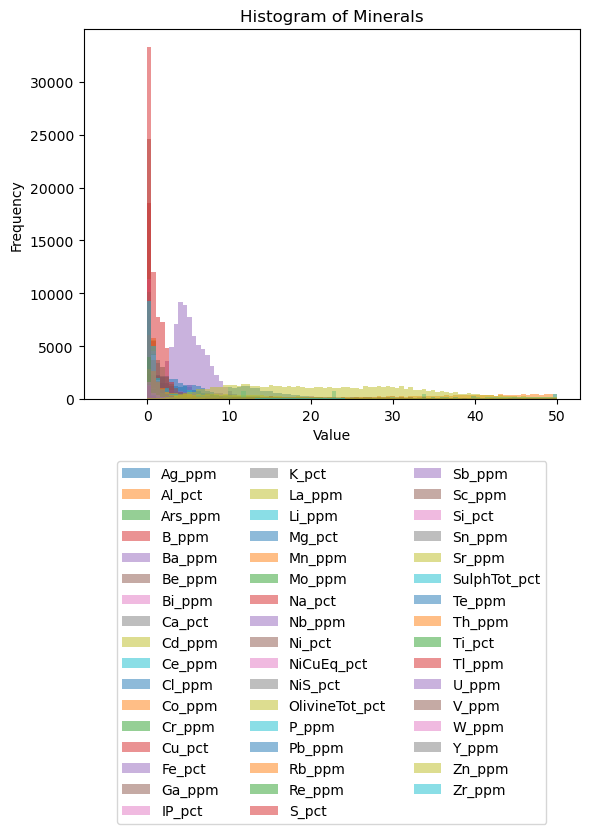

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Assuming you have a DataFrame named 'two_composite' and a list 'two_composite_minerals'
# containing the mineral names you want to plot

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Define the number of columns in the legend
num_columns = 3  # You can adjust this value as needed

# Calculate the number of rows required based on the number of minerals
num_minerals = len(two_composite_minerals)
num_rows = math.ceil(num_minerals / num_columns)

# Iterate through each mineral in two_composite_minerals
for i, mineral in enumerate(two_composite_minerals):
    # Select the data for the current mineral
    two_composite_1mineral = two_composite_filtered.loc[:, ["Name", 'X', 'Y', 'Z', mineral]]
    
    # Drop rows with NaN values in the mineral column
    two_composite_1mineral = two_composite_1mineral.dropna(subset=[mineral])
    
    # Plot a histogram for the current mineral
    ax.hist(two_composite_1mineral[mineral], bins=100, range=[-5, 50], alpha=0.5, label=mineral)

# Create a legend with multiple columns
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=num_columns)

# Add labels and a title
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Minerals')

# Show the plot
plt.show()

In [153]:
#Subset data for each mineral
mineral = 'Density_gcm3'
two_composite_1mineral = two_composite_filtered.loc[:,["Name", 'X', 'Y', 'Z', mineral]]
two_composite_1mineral = two_composite_1mineral.dropna(subset=[mineral])

#hole = 'KV397'
hole = 'KV-NME001'
two_composite_1mineral_1hole = two_composite_1mineral.loc[two_composite_1mineral['Name'] == hole]

<AxesSubplot:>

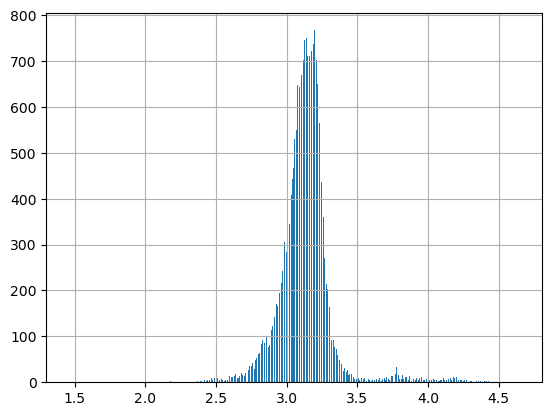

In [142]:
two_composite_filtered['Density_gcm3'].hist(bins=500)

#### Columns

Just the columns I didn't understand

[Gangue_Min, Interval_Length, Length*, Core_Angle**, Core_Diameter***, Dataset, Dest, Gamma_uRh, Gangue_Min,
Interval_Length, Ja****, Jn, Jr, Logged_By^, Ore_Type, Ori_Confidence, Reading_den, Reading_susc, 
Recovery_m, Recovery_Pct, Res_Wenner_ohmm, RQD_m, RQD_Pct, SulphTot_pct, Susc_SI, Vein1_Comp]



#### Questions:

1) Why are the Name of the holes different from the ones I have in a different dataset?
2) Why are there Alt1 and Alt2 cols, what's Int, Style, same question for Lith, Min, Sulph, Vein
3) Could the comments be useful?
4) Density and density_gcm3 are slightly different??
5) ^Companies, people, tool?
6) Orig_Lith diff to lith?
7) What are the "Proportion (...)"?
8) What do the 0 and 1 values mean for samp_id? Is it identical to SampleID?
9) Vein1_Comp, pct, style etc? 
10) What do the 2 and 3 mean in Weathering, why does it have also some odd values that are diff

#### Notes:

1) *Length is in the list because I don't understand how all the values are not 1
2) **Core_Angle goes from 0 to 90 
3) ***Core_Diameter is just 0s 
4) ****Ja mostly discrete values, same with Jn, Jr